In [1]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 15.0 MB/s eta 0:00:00


In [4]:
import control
import numpy as np
import matplotlib.pyplot as plt

# Capítulo 6 - A estabilidade de sistemas lineares com retroação

### **O conceito de estabilidade**

Ao se considerar o projeto e a análise de sistemas de controle com retroação, a estabilidade é da maior importância. De um ponto de vista prático, um sistema de controle a malha fechada que seja instável é de pouco valor. Muitos sistemas físicos são inerentemente instáveis a malha aberta. A maioria dos aviões de caça modernos são projetados para serem instáveis a malha aberta, e sem o controle ativo com retroação ajudando o piloto não poderiam voar. Com o uso da retroação é possível estabilizar processos instáveis e, assim, mediante a escolha judiciosa de valores de parâmetros, ajustar o desempenho em regime transitório. Para processos estáveis a malha aberta utiliza-se ainda a retroação para ajustar o desempenho a malha fechada de modo a alcançar as especificações de projeto.

Um sistema estável é definido como um sistema com resposta limitada (sem exceder valores de magnitude limitados). Isto é, se o sistema for submetido a uma excitação limitada ou a uma perturbação e a resposta for limitada em magnitude, o sistema é dito estável.

Um sistema estável é um sistema dinâmico com uma resposta limitada a uma entrada limitada.

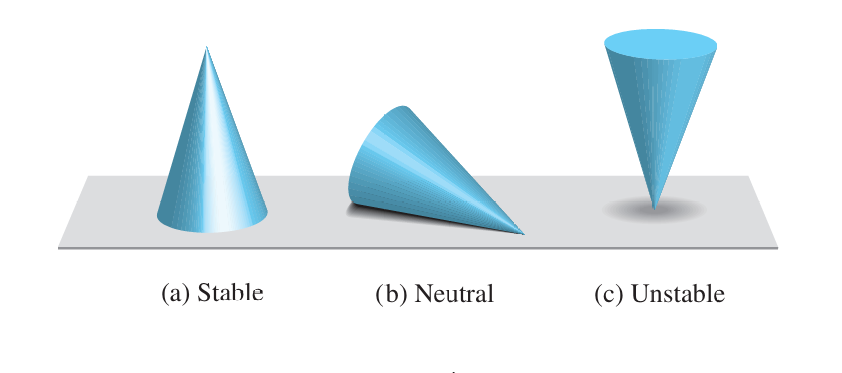

O conceito de estabilidade pode ser ilustrado considerando-se um cone de seção reta circular colocado sobre uma superfície plana. Se o cone estiver repousando sobre a base e for deslocado ligeiramente, retornará à sua posição de equilíbrio original. Estas posição e resposta são ditas estáveis. Se o cone estiver apoiado sobre a geratriz e for deslocado ligeiramente, ele rola sem nenhuma tendência a abandonar o apoio sobre a geratriz. Esta posição é designada como a estabilidade neutra. Por outro lado, se o cone for apoiado sobre o vértice e abandonado, ele cai para um dos lados. Esta posição é dita instável.

Em termos de sistemas lineares, reconhece-se que o requisito de estabilidade pode ser definido em termos da localização dos pólos da função de transferência a malha fechada. A função de transferência a malha fechada pode ser escrita como:

$$T(s) = \frac{p(s)}{q(s)} = \frac{K\prod_{i=1}^M(s + z_i)}{s^N\prod^Q_{k =1}(s + \sigma_k)\prod_{m=1}^R[s^2+2\alpha_ms + (\alpha^2_m + \omega^2_m)]}$$

onde $q(s) = Δ (s) = 0$ é a equação característica cujas raízes são os pólos do
sistema a malha fechada. A resposta a uma entrada em impulso (quando $N=0$) será então:

$$y(t) = \sum^Q_{k=1}A_ke^{-\sigma_kt} + \sum^R_{m=1}B_m\left(\frac{1}{\omega_m} \right)e^{-\alpha_mt}sen(\omega_mt + \theta_m)$$

onde $A_k$ e $B_m$ são constantes que dependem de $\sigma_k, z_i, \alpha_m, K$ . Para se obter uma resposta limitada, os pólos do sistema a malha fechada devem estar no lado esquerdo do plano $s$. Assim, uma condição necessária e suficiente para um sistema com retroação ser estável é que todos os pólos da função de transferência do sistema tenham parte real negativa.

### **O critério de estabilidade de Routh-Hurwitz**

No final dos anos 1800, A. Hurwitz e E. J. Routh publicaram independentemente um método de investigar a estabilidade de um sistema linear. O método de estabilidade de Routh-Hurwitz fornece uma resposta à questão da estabilidade considerando a equação característica do sistema. A equação característica no domínio de Laplace é escrita como:

$$\Delta(s) = q(s) = a_{n}s^{n} + a_{n-1}s^{n-1} + ... + a_{1}s + a_{0} = 0$$

Para assegurar a estabilidade do sistema é necessário determinar se alguma das
raízes de $q(s)$ se situa no semiplano $s$ da direita. Se a equação acima for escrita sob forma fatorada, tem-se:

$$a_n(s- r_1)(s- r_2)...(s- r_n) = 0$$

onde $r_i = $ i-ésima raiz da equação característica. Multiplicando-se os fatores, tem-se:

$$q(s) = a_{n}s^{n} - a_n(r_1 + r_2+ ... + r_n)s^{n-1} \\ \qquad + \  a_n(r-1r_2 + r-2r_3 + r-1r_3 + ...)s^{n-2} \\ \qquad - \ a_n(r-1r_2r_3 + r-1r_2r_4 ...)s^{n-3} + ... \\ \qquad + \  a_n(-1)^nr-1r_2r_3 ... r_n = 0 $$

Examinando-se a equação acima, observa-se que todos os coeficientes do polinômio devem ter o mesmo sinal se todas as raízes estiverem no semiplano s da esquerda. Também é necessário para um sistema estável que todos os coeficientes sejam não nulos. Estes requisitos são necessários mas não suficientes. Isto é, sabe-se imediatamente que o sistema é instável se elas não forem atendidas; contudo, se forem satisfeitas, deve-se prosseguir para garantir a estabilidade do sistema. Por exemplo, se a equação característica for:

$$q(s)=(s+2)(s^2-s+4) = (s^3 + s^2 + 3s + 8)$$

o sistema é instável e, contudo, o polinômio possui todos os coeficientes positivos. \

O critério de Routh-Hurwitz é um critério necessário e suficiente para a estabilidade de sistemas lineares. O método foi desenvolvido inicialmente em termos de determinantes, mas se utilizará a formulação mais conveniente de um arranjo em forma de tabela. \

O critério de Routh-Hurwitz estabelece que o número de raízes de q(s) com parte real positiva é igual ao número de trocas de sinal da primeira coluna da tabela de Routh.

### **Exemplo - Sistema de segunda ordem**



O polinômio característico de um sistema de segunda ordem é:

$$q(s)=a_2s^2 + a_1s + a_0$$
\
O arranjo de Routh é escrito como:



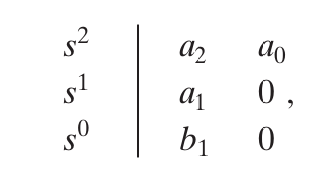




onde:

$$b_1 = \frac{a_1a_0 - (0)a_2}{a_1} = \frac{-1}{a_1}\begin{vmatrix}
a_2 & a_0\\
a_1 & 0
\end{vmatrix} = a_0$$

Portanto, o requisito para um sistema de segunda ordem ser estável é simplesmente que todos os coeficientes sejam positivos ou todos os coeficientes sejam negativos.


### **A estabilidade relativa de sistemas de controle com retroação**


A verificação da estabilidade usando o critério de Routh-Hurwitz fornece somente uma resposta parcial à questão de estabilidade. O critério de Routh-Hurwitz assegura a estabilidade absoluta de um sistema determinando se alguma das raízes da equação característica está no semiplano $s$ da direita. Contudo, se o sistema satisfizer e for absolutamente estável, é desejável determinar a estabilidade relativa; isto é, é necessário investigar o amortecimento relativo de cada uma das raízes da equação característica. \

A estabilidade relativa de um sistema pode ser definida como uma propriedade que é medida pela parte real relativa de cada raiz ou par de raízes. Assim a raiz $r_2$ é relativamente mais estável que as raízes $r_1$ e $ \widehat{r}_1$, como está mostrado na figura abaixo:

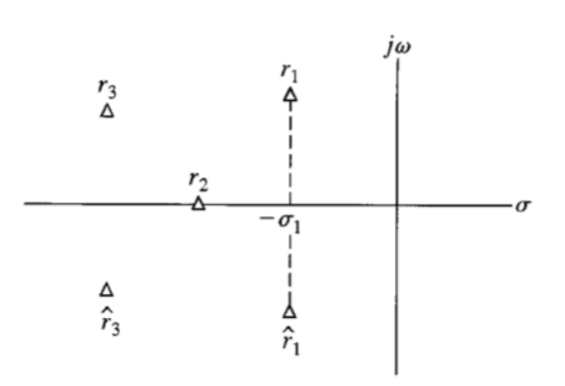

#### **Exemplo - Deslocamento de eixos**

Considere-se a equação característica simples de terceira ordem \
\
$$q(s) = s^3 + 4s^2 + 6s + 4 $$
\
Como primeira tentativa, seja $s_n=s+2$ e observe-se que se obtém um arranjo de Routh sem ocorrência de zero na primeira coluna. Contudo, ao se definir a variável deslocada $s$, igual a $s+1$, obtém-se: \
\
$$(s_n-1)^3+4(s_n-1)^2+6(s_n-1)+4=s^3_n+s^2_n+s_n+1$$


Então o arranjo de Routh é estabelecido como:

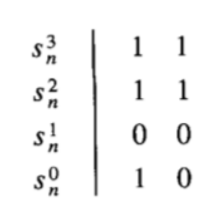

Há raízes sobre o eixo imaginário deslocado que podem ser obtidas a partir do polinômio auxiliar:

$$U(s_n)=s^2_n+1=(s_n+j)(s_n-j)=(s+1+j)(s+1-j)$$

O deslocamento de eixo do plano s para assegurar a estabilidade relativa de um sistema é uma abordagem muito útil, particularmente para sistemas de ordem elevada com diversos pares de raízes a malha fechada complexas conjugadas.

#### **A estabilidade de sistemas com variáveis de estado**

A estabilidade de um sistema modelado por meio de diagrama de fluxo com variáveis de estado pode ser determinada prontamente. A estabilidade de um sistema com função de transferência $T(s)$ relacionando saída e entrada pode ser determinada examinando-se o polinômio do denominador de $T(s)$. Por conseguinte, se a função de transferência for escrita como:\
\
$$T(s)=\frac{p(s)}{q(s)}$$

onde $p(s)$ e $q(s)$ são polinômios em s, então a estabilidade do sistema está representada pelas raízes de q(s). O polinômio q(s), quando igualado a zero, é chamado de equação característica. Se o sistema que está sendo investigado for representado por um diagrama de fluxo de sinal com variáveis de estado, obtém-se a equação característica calculando o determinante do diagrama de fluxo.

#### **Exemplo - Estabilidade de um sistema**

A função de transferência $T(s)$ é dada por:

$$T(s)=\frac{2s^2+8s+6}{s^3+8s^2+16s+6}$$

O polinômio característico para este sistema é:

$$
q(s) = s^3 + 8s^2 + 16s + 6
$$

Usando o critério de Routh-Hurwitz, acha-se que o sistema é estável e que todas as raízes de $q(s)$ estão no semiplano $s$ da esquerda.

Determina-se frequentemente o modelo em diagrama de fluxo com variáveis de estado diretamente a partir de um conjunto de equações diferenciais de estado. Neste caso, pode-se usar o diagrama de fluxo diretamente na determinação da estabilidade do sistema obtendo-se a equação característica a partir do determinante $\Delta(s)$ do diagrama de fluxo.

## Estabilidade de sistema usando Matlab

Estabilidade de Routh-Hurwitz. Como assinalado anteriormente, o critério de Routh-Hurwitz é um critério necessário e suficiente para estabilidade. Dada uma equação característica com coeficientes
fixos, pode-se usar Routh-Hurwitz para determinar o número de raízes no semiplano $s$ da direita. Por exemplo, considere-se a equação

$$
q(s) = s^3+s^2+ 2s+ 24 = 0
$$

associada com o sistema de controle a malha fechada mostrado na figura abaixo:

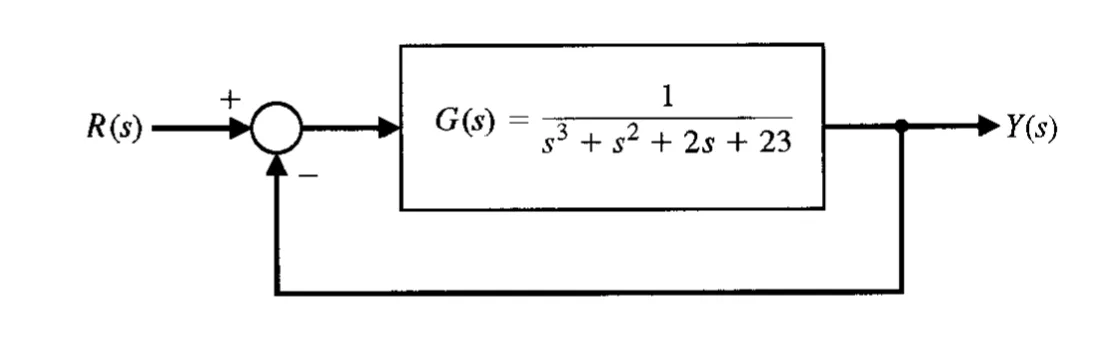

A tabela de Routh-Hurwitz correspondente está mostrada abaixo:

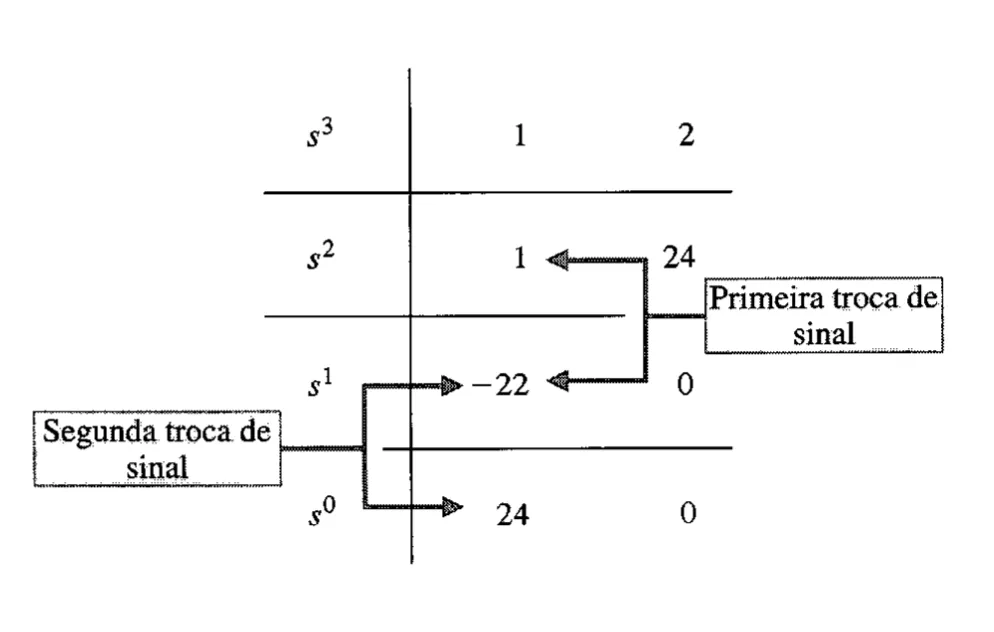

As duas trocas de sinal na primeira coluna indicam que há duas raízes do polinômio característico no semiplano s da direita; portanto, o sistema a malha fechada é instável. Com o uso do MATLAB, pode-se verificar o resultado do método de Routh-Hurwitz calculando-se diretamente as raízes da equação característica, como está mostrado abaixo, por meio da função **roots.**

```matlab
numg=[1];
deng=[1 1 2 23];

[num,den]=cloop(numg,deng);
roots(den)
```

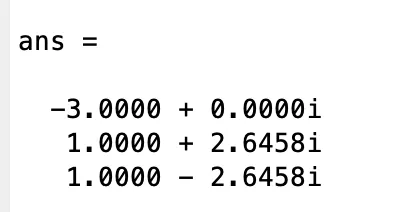

### **Traduzindo para Python**


Para traduzir esse código para Python, usaremos a biblioteca control, que é semelhante à Control System Toolbox do MATLAB.

In [2]:
# Definindo as funções de transferência
numg = [1]
deng = [1, 1, 2, 23]

# Criando a função de transferência G(s)
G = control.tf(numg, deng)

# Calculando a função de transferência de malha fechada
T = control.feedback(G)

# Extraindo o denominador da função de transferência de malha fechada
den = T.den[0][0]

# Calculando as raízes do denominador
roots = np.roots(den)

# Imprimindo as raízes
print(roots)

[-3.+0.j          1.+2.64575131j  1.-2.64575131j]


Todas as vezes em que a equação característica for função de um único parâmetro, pode-se utilizar o método de Routh-Hurwitz para determinar a faixa de valores que o parâmetro pode assumir mantendo a estabilidade.

Considere-se o sistema com retroação a malha fechada da figura abaixo:

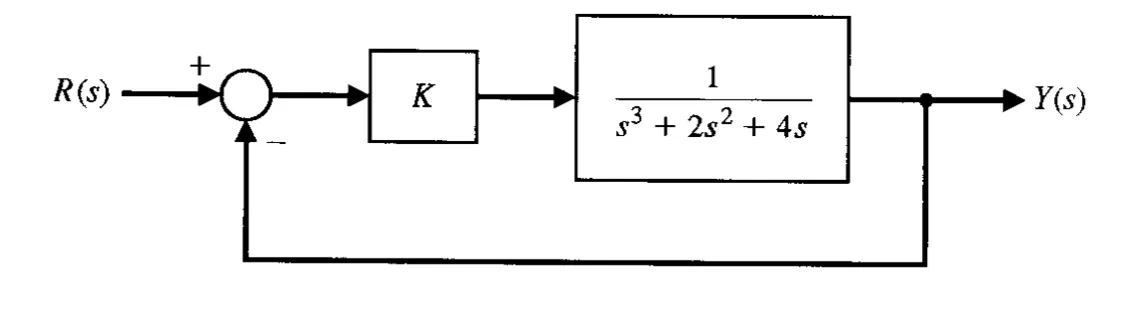



A equação característica é:

$$
q(s) = s^3+2s^2+ 4s + K = 0
$$

Usando a abordagem de Routh-Hurwitz, encontra-se $O \leq K \leq 8$ como requisito de estabilidade. Pode-se usar o MATLAB para verificar este resultado graficamente.

```matlab
K=[0:0.5:20];
for i=1:length(K)
    q=[1 2 4 K(i)];
    p(:,i)=roots(q);
end
plot(real(p),imag(p),'X'),grid
xlabel ('Eixo real'), ylabel ('Eixo imaginário')
```

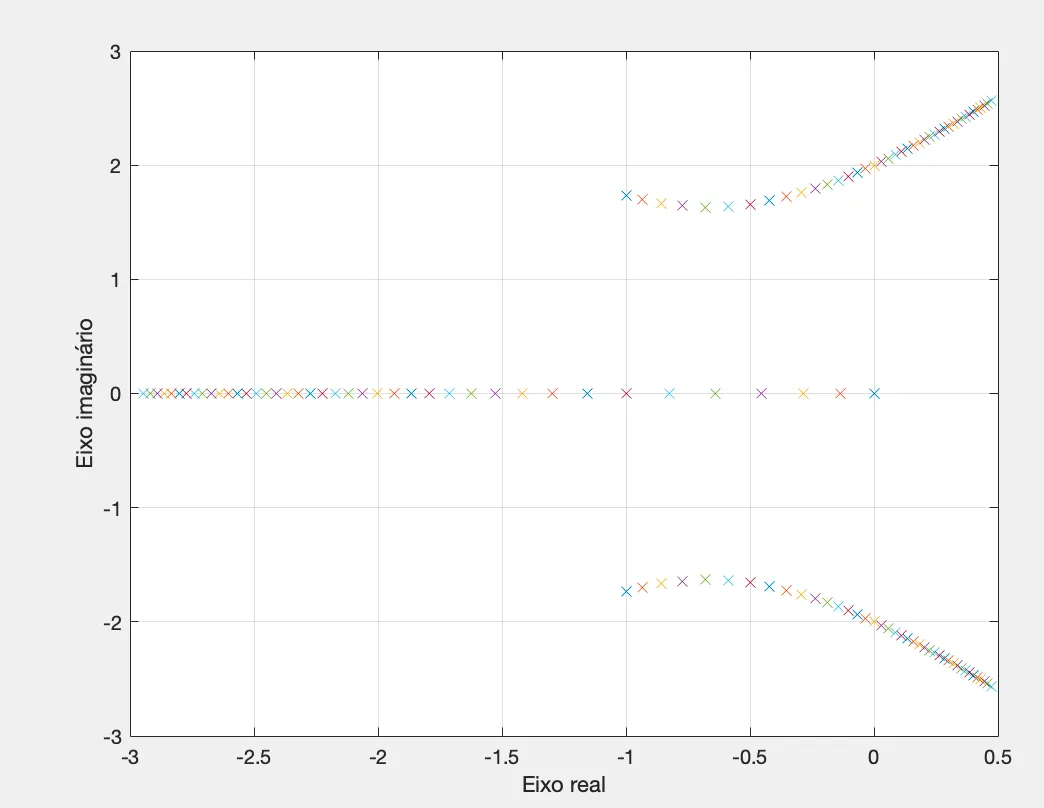

### **Traduzindo para Python**

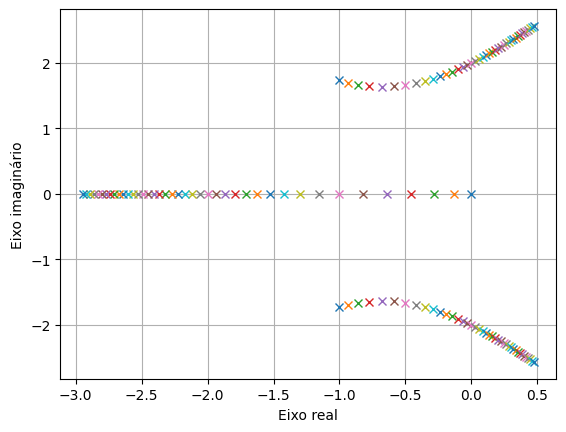

In [5]:
# Definindo o vetor K
K = np.arange(0, 20.5, 0.5)

# Inicializando a matriz p
p = np.zeros((3, len(K)), dtype=complex)

# Loop para calcular as raízes
for i, k in enumerate(K):
    q = [1, 2, 4, k]
    p[:, i] = np.roots(q)

# Plotando o lugar das raízes
plt.plot(np.real(p), np.imag(p), 'x')
plt.grid(True)
plt.xlabel('Eixo real')
plt.ylabel('Eixo imaginário')
plt.show()

Como está mostrado no gráfico acima, cria-se o vetor de valores de $K$ para os quais se deseja calcular as raízes da equação característica. Em seguida, usando-se a função roots, são calculadas e plotadas as raízes da equação característica, como está mostrado no código acima.

Pode-se ver que, à medida que K aumenta, raízes da equação característica se movem na direção do semiplano s da direita quando $K$ tende a $8$, e entram finalmente no semiplano s da direita quando $K > 8$.

O exemplo define um laço que se repete 10 vezes. Durante a i-ésima iteração, onde $1 \leq i \leq 10$, o i-ésimo elemento do vetor a é feito igual a 20, e o escalar b é recalculado.

O método de Routh-Hurwitz permite estabelecer declarações definitivas referentes à estabilidade absoluta de um sistema linear. O método não se aplica à obtenção da estabilidade relativa, que é diretamente relacionada com a localização das raízes da equação característica. O método de Routh-Hurwitz diz quantos pólos estão no semiplano s da direita, mas não a localização específica dos pólos. Com o MATLAB, pode-se calcular, de modo fácil, os pólos explicitamente, permitindo assim comentar a respeito da estabilidade relativa do sistema.

## Conclusão do capítulo

Neste capítulo foi possível ver os métodos de estabilidade de um sistema com retroação, baseado no método de Routh-Hurwitz foi visto as vantagens e desvantagens para um sistema, vendo a estabilidade quanto a resposta limitada e a localização, no plano $s$, dos polos da função de transferência do sistema.